In [2]:
import numpy as np
import pandas as pd
import pyflux as pf
import datetime as datetime
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inline
import seaborn as sns


In [3]:
pwd

'/Users/davidsmith/Documents/Galvanize/Capstone'

In [67]:
# the data is sitting in the model list already under forecast
# Don't start from initial_distrib - just go to model list
#dist_list = pickle.load(open('data/initial_distrib', 'rb'))
model_list = pickle.load(open('src/initial_model_results', 'rb'))



In [52]:
dist_list = []
for i in range(len(model_list)):
    dist_list.append(model_list[i]['forecast'])

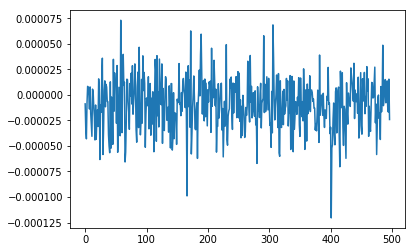

In [53]:
plt.plot(model_list[0]['forecast'][:,4])

In [ ]:
# x = [random.gauss(3,1) for _ in range(400)]
# y = [random.gauss(4,2) for _ in range(400)]

# bins = numpy.linspace(-10, 10, 100)

# pyplot.hist(x, bins, alpha=0.5, label='x')
# pyplot.hist(y, bins, alpha=0.5, label='y')
# pyplot.legend(loc='upper right')
# pyplot.show()

## NEED TO RECREATE THE CROSS VALIDATION SET OF FORWARDS

In [10]:
# NOTE: this will clean up what we need to do later
X_fwds_cv = pickle.load(open('data/fwd_cv_data', 'rb'))
X_fwds_cv.describe()

,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,d_six_m,d_one_y,d_two_y,d_three_y,d_five_y,d_seven_y,d_ten_y,ed_last,ed_avg_n,cos_last,cos_avg_n,ed_last_l1,ed_last_l2
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,4.890000e+02,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.004141,0.007312,0.011697,0.015925,0.021423,0.027262,0.026463,0.000018,0.000014,0.000012,0.000005,0.000003,0.000001,8.222810e-07,0.168447,0.168550,0.032424,0.032318,0.168447,0.168447
std,0.002151,0.002213,0.002499,0.003584,0.004184,0.003997,0.003762,0.000197,0.000368,0.000555,0.000634,0.000623,0.000690,5.743519e-04,0.423652,0.423877,0.084750,0.084287,0.423652,0.423652
min,0.000500,0.003403,0.007013,0.008720,0.013098,0.018210,0.018246,-0.000800,-0.001506,-0.002012,-0.002012,-0.002007,-0.002510,-1.963840e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002600,0.005510,0.009926,0.012542,0.017283,0.023585,0.023402,-0.000100,-0.000201,-0.000303,-0.000405,-0.000455,-0.000416,-3.718279e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.004300,0.007114,0.010835,0.016181,0.022161,0.028600,0.028019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.430341e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005100,0.008721,0.013353,0.018902,0.025135,0.030604,0.029457,0.000100,0.000201,0.000402,0.000405,0.000404,0.000456,3.371911e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.009700,0.012137,0.017684,0.022944,0.028853,0.034434,0.032752,0.001000,0.001708,0.001813,0.001816,0.002655,0.003046,2.070701e-03,1.330989,1.326005,0.373948,0.373948,1.330989,1.330989


In [8]:
total_obs = len(X_fwds)
train_int = int(round(total_obs*.7, 0))
cv_int = int(round(total_obs*.85, 0))

fwd_train = X_fwds[0:train_int]
fwd_cv = X_fwds[train_int:cv_int]
fwd_test = X_fwds[cv_int:]

NameError: name 'X_fwds' is not defined

In [9]:
X_fwds = X_fwds.drop(X_fwds.index[0])
fwd_cv.head()

NameError: name 'X_fwds' is not defined

In [63]:
column_names = X_fwds_cv.columns

ind = np.arange(7,14)
rate_titles = column_names[ind]

print(rate_titles)
print(rate_titles[0])
# indices = np.arange(7, len(column_names))
# print(indices)
# result = [column_names[i] for i in indices]


# result

Index(['d_six_m', 'd_one_y', 'd_two_y', 'd_three_y', 'd_five_y', 'd_seven_y',
       'd_ten_y'],
      dtype='object')
d_six_m


In [66]:
 X = X_fwd_cv[['d_six_m', 'd_one_y', 'd_two_y', 'd_three_y', 'd_five_y', 'd_seven_y', 'd_ten_y']].values

NameError: name 'X_fwd_cv' is not defined

In [ ]:
# load up the model_list variable as well

In [60]:
model_list

[{'model_type': pyflux.arma.arma.ARIMA,
  'model_class': 'ARIMA',
  'name': 'Normal ARIMA(1,1,1)',
  'target': 'd_ten_y',
  'hyper_params': {'ar': 1, 'ma': 1, 'diff_ord': 0},
  'num_components': 1,
  'forecast': array([[-1.75356616e-05, -2.64040499e-05, -2.75835923e-05, ...,
          -8.87585339e-06, -1.74658700e-06,  3.61426357e-06],
         [-1.75397732e-05, -1.83241584e-05, -5.47445690e-05, ...,
          -3.41548816e-05, -7.60271712e-06, -1.77657559e-05],
         [-1.75203649e-05, -1.81502360e-05, -5.57792224e-05, ...,
          -4.30770488e-05, -1.30795868e-05, -1.66695983e-05],
         ...,
         [-6.76471146e-06, -3.49406666e-05, -4.24448303e-05, ...,
          -1.68653992e-05, -2.23543637e-05, -9.86041451e-06],
         [-1.20429870e-05, -2.16869331e-05, -9.46064284e-06, ...,
           1.53091343e-05,  3.92154098e-06, -5.01496510e-06],
         [-1.82628223e-05, -7.62782474e-06, -9.27906947e-06, ...,
          -2.41785736e-05, -2.02547077e-05, -7.22469363e-06]])},
 {'mo

In [57]:
model_index = 0

In [81]:
def plot_model_distributions(model_index, model_list, X_fwds, fig_filename=False):
    
    model_name = model_list[model_index]['name']
    
    column_names = X_fwds.columns
    ind = np.arange(7,14)
    rate_titles = column_names[ind]

    fig, axs = plt.subplots(7, 2, figsize = (15,15))
    super_title = model_name + ' Model Noise'
    fig.suptitle(super_title, fontsize=24)

    for i, ax in enumerate(axs.flatten()):
        if i%2==0:
            this_index = i/2
            this_index = int(this_index)
            this_rate = rate_titles[this_index]
            print("This is the index for the rows", this_index, ' with this rate ', this_rate)
            # Charts on left hand side are model noise
            ax.plot(model_list[model_index]['forecast'][:,this_index])
            ax.set_title(model_name +' Model error ' + this_rate+  ' forward rate')
            ax.grid()
            ax.set_facecolor('whitesmoke')
        else:
            sns.distplot(dist_list[0][:,0], hist=False, color = 'red', kde_kws={'shade': True}, ax=ax, label='ARIMA')
            sns.distplot(X[:,0], hist=False, color = 'black', kde_kws={'shade': True}, ax=ax, label='Actual daily change')

            ax.set_title('Distribution of ' + model_name + 'Model for '+ this_rate +' forward rate')
            ax.grid()
            ax.set_facecolor('whitesmoke')

    plt.tight_layout()
    fig.subplots_adjust(top = .92)
    # plt.savefig('plot_of_error.png')


In [82]:
plot_model_distributions(model_index, model_list, X_fwds)

NameError: name 'X_fwds' is not defined

In [176]:
model_list[0]

{'model_type': pyflux.arma.arma.ARIMA,
 'model_class': 'ARIMA',
 'name': 'Normal ARIMA(1,0,1)',
 'target': 'd_ten_y',
 'hyper_params': {'ar': 1, 'ma': 1, 'diff_ord': 0},
 'num_components': 1,
 'forecast': array([[-1.75356616e-05, -2.64040499e-05, -2.75835923e-05, ...,
         -8.87585339e-06, -1.74658700e-06,  3.61426357e-06],
        [-1.75397732e-05, -1.83241584e-05, -5.47445690e-05, ...,
         -3.41548816e-05, -7.60271712e-06, -1.77657559e-05],
        [-1.75203649e-05, -1.81502360e-05, -5.57792224e-05, ...,
         -4.30770488e-05, -1.30795868e-05, -1.66695983e-05],
        ...,
        [-6.76471146e-06, -3.49406666e-05, -4.24448303e-05, ...,
         -1.68653992e-05, -2.23543637e-05, -9.86041451e-06],
        [-1.20429870e-05, -2.16869331e-05, -9.46064284e-06, ...,
          1.53091343e-05,  3.92154098e-06, -5.01496510e-06],
        [-1.82628223e-05, -7.62782474e-06, -9.27906947e-06, ...,
         -2.41785736e-05, -2.02547077e-05, -7.22469363e-06]])}

In [59]:
this_index=0
plt.plot(dist_list[model_number][:,this_index])

NameError: name 'model_number' is not defined

In [48]:
test = 0/2
test = int(test)
test

0

In [ ]:
# NEED TO ADD DATES

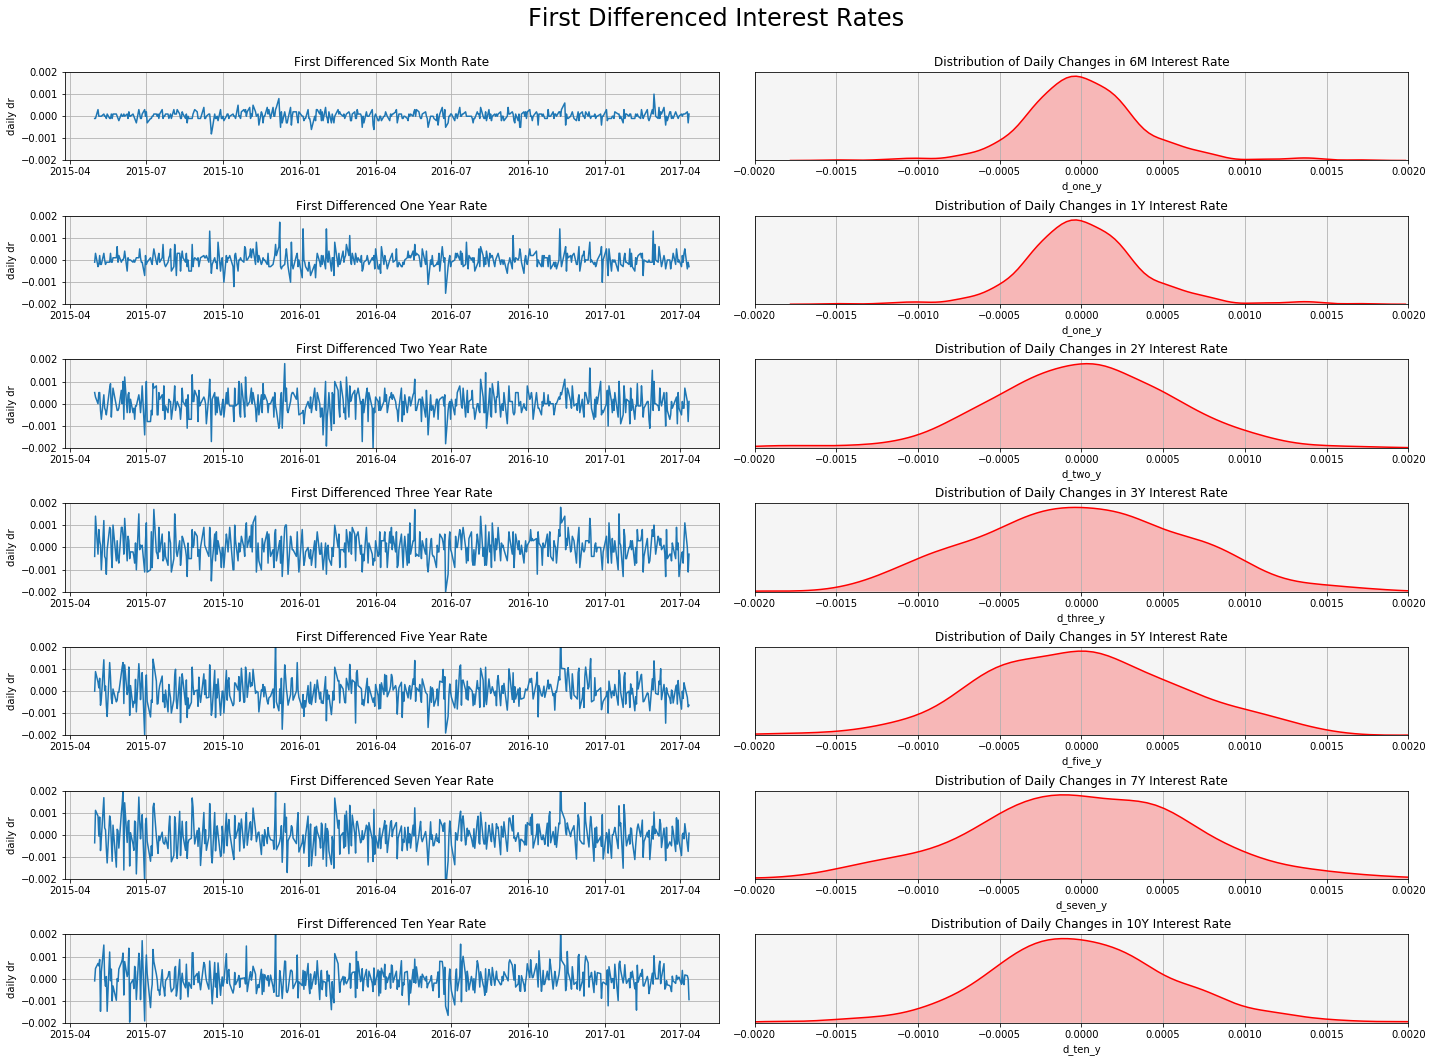

In [68]:
fig, axs = plt.subplots(7, 2, figsize = (20,15))
fig.suptitle('First Differenced Interest Rates', fontsize=24)

axs[0,0].plot(X_fwds_cv.index, X_fwds_cv['d_six_m'])
axs[0,0].set_title('First Differenced Six Month Rate')
axs[0,0].set_ylim(bottom = -0.002, top = 0.002)
axs[0,0].set_ylabel('daily dr')
sns.distplot(X_fwds_cv['d_one_y'], hist=False, color = 'red', kde_kws={'shade': True}, ax=axs[0,1])
axs[0,1].set_yticks([])
axs[0,1].set_xlim(left = -0.002, right = 0.002)
#sns.distplot(X_fwds_cv['d_six_m'], kde=True, norm_hist=True, ax=axs[0,1])
axs[0,1].set_title('Distribution of Daily Changes in 6M Interest Rate')

axs[1,0].plot(X_fwds_cv.index, X_fwds_cv['d_one_y'])
axs[1,0].set_title('First Differenced One Year Rate')
axs[1,0].set_ylim(bottom = -0.002, top = 0.002)
axs[1,0].set_ylabel('daily dr')

sns.distplot(X_fwds_cv['d_one_y'], hist=False, color = 'red', kde_kws={'shade': True}, ax=axs[1,1])
axs[1,1].set_title('Distribution of Daily Changes in 1Y Interest Rate')
axs[1,1].set_yticks([])
axs[1,1].set_xlim(left = -0.002, right = 0.002)


axs[2,0].plot(X_fwds_cv.index, X_fwds_cv['d_two_y'])
axs[2,0].set_title('First Differenced Two Year Rate')
axs[2,0].set_ylim(bottom = -0.002, top = 0.002)
axs[2,0].set_ylabel('daily dr')

sns.distplot(X_fwds_cv['d_two_y'], hist=False, color = 'red', kde_kws={'shade': True}, ax=axs[2,1])
axs[2,1].set_title('Distribution of Daily Changes in 2Y Interest Rate')
axs[2,1].set_yticks([])
axs[2,1].set_xlim(left = -0.002, right = 0.002)


axs[3,0].plot(X_fwds_cv.index, X_fwds_cv['d_three_y'])
axs[3,0].set_title('First Differenced Three Year Rate')
axs[3,0].set_ylim(bottom = -0.002, top = 0.002)
axs[3,0].set_ylabel('daily dr')

sns.distplot(X_fwds_cv['d_three_y'], hist=False, color = 'red', kde_kws={'shade': True}, ax=axs[3,1])
axs[3,1].set_title('Distribution of Daily Changes in 3Y Interest Rate')
axs[3,1].set_yticks([])
axs[3,1].set_xlim(left = -0.002, right = 0.002)


axs[4,0].plot(X_fwds_cv.index, X_fwds_cv['d_five_y'])
axs[4,0].set_title('First Differenced Five Year Rate')
axs[4,0].set_ylim(bottom = -0.002, top = 0.002)
axs[4,0].set_ylabel('daily dr')

sns.distplot(X_fwds_cv['d_five_y'], hist=False, color = 'red', kde_kws={'shade': True}, ax=axs[4,1])
axs[4,1].set_title('Distribution of Daily Changes in 5Y Interest Rate')
axs[4,1].set_yticks([])
axs[4,1].set_xlim(left = -0.002, right = 0.002)


axs[5,0].plot(X_fwds_cv.index, X_fwds_cv['d_seven_y'])
axs[5,0].set_title('First Differenced Seven Year Rate')
axs[5,0].set_ylim(bottom = -0.002, top = 0.002)
axs[5,0].set_ylabel('daily dr')

sns.distplot(X_fwds_cv['d_seven_y'], hist=False, color = 'red', kde_kws={'shade': True}, ax=axs[5,1])
axs[5,1].set_title('Distribution of Daily Changes in 7Y Interest Rate')
axs[5,1].set_yticks([])
axs[5,1].set_xlim(left = -0.002, right = 0.002)


axs[6,0].plot(X_fwds_cv.index, X_fwds_cv['d_ten_y'])
axs[6,0].set_title('First Differenced Ten Year Rate')
axs[6,0].set_ylim(bottom = -0.002, top = 0.002)
axs[6,0].set_ylabel('daily dr')

sns.distplot(X_fwds_cv['d_ten_y'], hist=False, color = 'red', kde_kws={'shade': True}, ax=axs[6,1])
axs[6,1].set_title('Distribution of Daily Changes in 10Y Interest Rate')
axs[6,1].set_yticks([])
axs[6,1].set_xlim(left = -0.002, right = 0.002)


axs[0,0].grid()
axs[0,1].grid()

axs[1,0].grid()
axs[1,1].grid()

axs[2,0].grid()
axs[2,1].grid()
axs[3,0].grid()
axs[3,1].grid()
axs[4,0].grid()
axs[4,1].grid()
axs[5,0].grid()
axs[5,1].grid()
axs[6,0].grid()
axs[6,1].grid()

axs[0,0].set_facecolor('whitesmoke')
axs[1,0].set_facecolor('whitesmoke')
axs[2,0].set_facecolor('whitesmoke')
axs[3,0].set_facecolor('whitesmoke')
axs[4,0].set_facecolor('whitesmoke')
axs[5,0].set_facecolor('whitesmoke')
axs[6,0].set_facecolor('whitesmoke')

axs[0,1].set_facecolor('whitesmoke')
axs[1,1].set_facecolor('whitesmoke')
axs[2,1].set_facecolor('whitesmoke')
axs[3,1].set_facecolor('whitesmoke')
axs[4,1].set_facecolor('whitesmoke')
axs[5,1].set_facecolor('whitesmoke')
axs[6,1].set_facecolor('whitesmoke')



fig.tight_layout()
fig.subplots_adjust(top = .92)
plt.savefig('plot_of_error.png')


In [79]:
these_dates = X_fwds_cv.index
these_dates

DatetimeIndex(['2015-04-30', '2015-05-01', '2015-05-04', '2015-05-05',
               '2015-05-06', '2015-05-07', '2015-05-08', '2015-05-11',
               '2015-05-12', '2015-05-13',
               ...
               '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10',
               '2017-04-11', '2017-04-12'],
              dtype='datetime64[ns]', name='Date', length=489, freq=None)

In [122]:
model_list[0]['name']

'Normal ARIMA(1,1,1)'

In [191]:
a = np.max(model_list[2]['forecast'])
print(a)
b= np.min(model_list[2]['forecast'])
print(b)

-3.880869348689812e-06
-1.862157534246575e-05


In [61]:
x_tick_index = [1, 101, 201, 301, 401]

y_max = 0.0002
y_min = -0.0002


ValueError: x and y must have same first dimension, but have shapes (489,) and (497,)

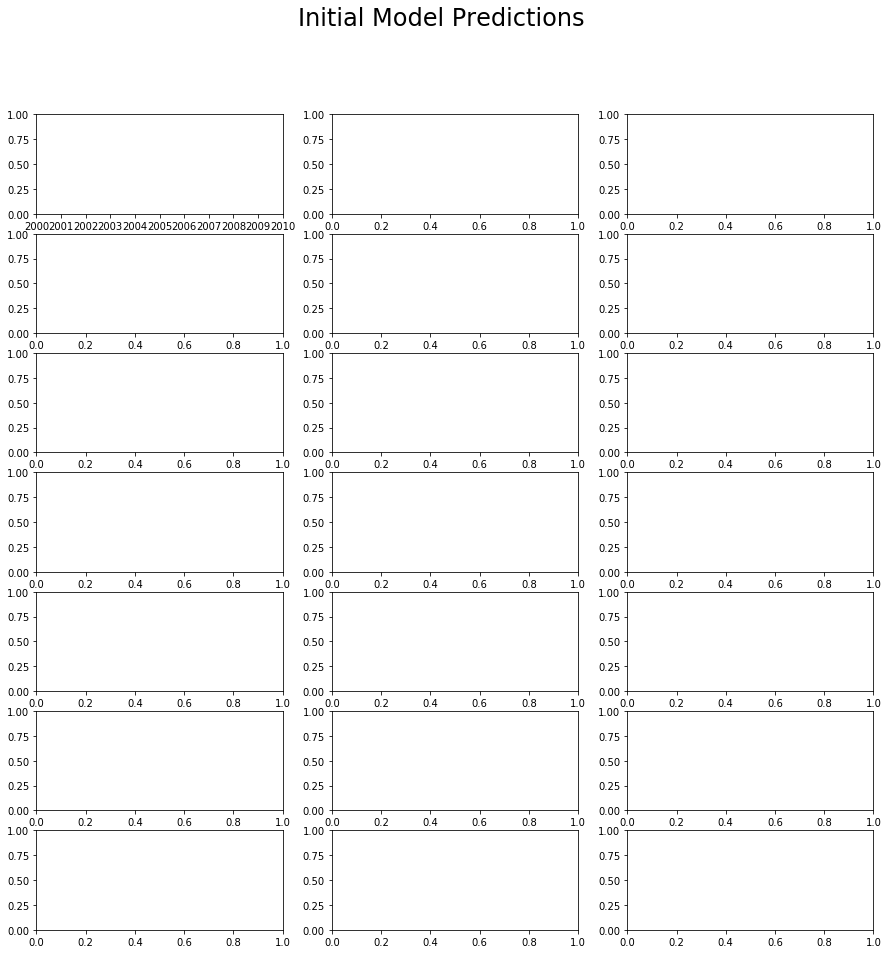

In [80]:
fig, axs = plt.subplots(7, 3, figsize = (15,15))
fig.suptitle('Initial Model Predictions', fontsize=24)

for i, ax in enumerate(axs.flatten()):

    this_row = int(i/3)
    this_rate = rate_titles[this_row]

    this_column = i%3
    this_name = model_list[this_column]['name']
    this_title = this_name + ' forecast for ' + this_rate + ' forward'
    #print(this_title)
    ax.plot(these_dates, model_list[this_column]['forecast'][:,this_row])
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 250))
    #ax.x_axis.set_ticks(x_tick_index)
    ax.set_title(this_title)
    ax.set_ylim(bottom=y_min, top=y_max)
    ax.grid()
    ax.set_facecolor('whitesmoke')
plt.tight_layout() 
fig.subplots_adjust(top = .92)
plt.savefig('initial_model_predictions.png')


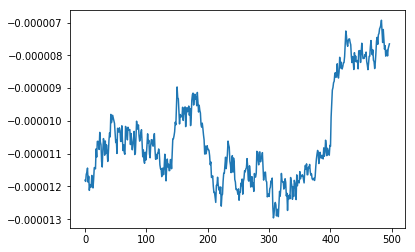

In [168]:
plt.plot(model_list[0]['forecast'][:,3])

whos

In [77]:
X_fwds_cv.index

DatetimeIndex(['2015-04-30', '2015-05-01', '2015-05-04', '2015-05-05',
               '2015-05-06', '2015-05-07', '2015-05-08', '2015-05-11',
               '2015-05-12', '2015-05-13',
               ...
               '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10',
               '2017-04-11', '2017-04-12'],
              dtype='datetime64[ns]', name='Date', length=489, freq=None)

In [73]:
whos

Variable                   Type           Data/Info
---------------------------------------------------
X_fwds_cv                  DataFrame                   six_m     on<...>\n[489 rows x 20 columns]
ax                         AxesSubplot    AxesSubplot(0.125,0.787927;0.227941x0.0920732)
axs                        ndarray        7x3: 21 elems, type `object`, 168 bytes
column_names               Index          Index(['six_m', 'one_y', <...>],\n      dtype='object')
datetime                   module         <module 'datetime' from '<...>b/python3.6/datetime.py'>
dist_list                  list           n=3
fig                        Figure         Figure(1080x1080)
i                          int            0
ind                        ndarray        7: 7 elems, type `int64`, 56 bytes
model_index                int            0
model_list                 list           n=3
np                         module         <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
os              

In [ ]:
fig, axs = plt.subplots(7, 1, figsize = (15,15))
fig.suptitle('Model Noise', fontsize=24)
axs[0,0].plot(dist_list[0][:,0])
axs[0,0].set_title('ARIMA Model error 6 month forward rate')
sns.distplot(dist_list[0][:,0], hist=False, color = 'red', kde_kws={'shade': True}, ax=axs[0,1], label='ARIMA')
sns.distplot(X[:,0], hist=False, color = 'black', kde_kws={'shade': True}, ax=axs[0,1], label='Actual daily change')

axs[0,1].set_title('Distribution of ARIMA Model for 6M forward rate')


axs[1,0].plot(dist_list[0][:,1])
axs[1,0].set_title('ARIMA error 1 year forward rate')
sns.distplot(dist_list[0][:,1], hist=False, color = 'red', kde_kws={'shade': True}, ax=axs[1,1], label = 'ARIMA')
sns.distplot(X[:,1], hist=False, color = 'black', kde_kws={'shade': True}, ax=axs[1,1], label='Actual daily change')
axs[1,1].set_title('Distribution of ARIMA Model for 1Y forward rate')


In [83]:
X_fwds_cv.index

DatetimeIndex(['2015-04-30', '2015-05-01', '2015-05-04', '2015-05-05',
               '2015-05-06', '2015-05-07', '2015-05-08', '2015-05-11',
               '2015-05-12', '2015-05-13',
               ...
               '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10',
               '2017-04-11', '2017-04-12'],
              dtype='datetime64[ns]', name='Date', length=489, freq=None)